# Soma Dois Dados

Aqui tem um texto simulando um pouco como seria o lançamento de dois dados.


In [1]:
# função que retorna um inteiro aleatoriamente de forma uniforme.
from random import randint


Primeiro vamos testar essa função `randint` será que ela tem distribuição uniforme "mesmo"?


In [2]:
resultados = []  # Uma lista que vai guardar os resultados do randint
limit = 100000  # O tanto de vezes que simular

for i in range(limit):
    resultados.append(randint(1, 6))


In [3]:
import pandas as pd  # Biblioteca para trabalhar com tabelas e fazer análises nela

# organiza a tabela direitinho...
df = pd.DataFrame(resultados, columns=["Resultado"])
df.head()  # Mostra as primeiras 5 linhas da tabela


,Resultado
0,2
1,2
2,5
3,4
4,5


<Axes: xlabel='Resultado', ylabel='count'>

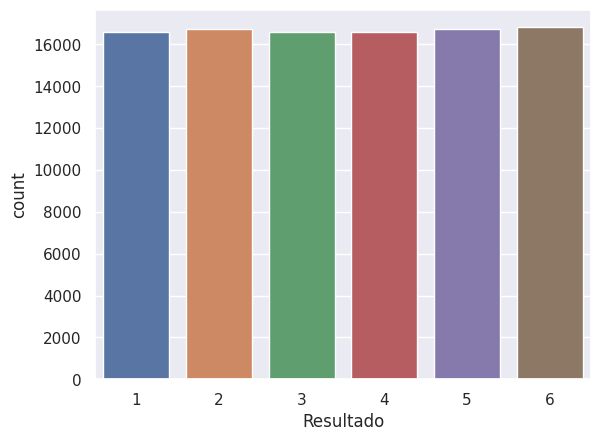

In [4]:
import seaborn as sns  # Tabela para fazer os gráficos
sns.set_theme()  # escolhe tema padrão para colorir a figura
sns.countplot(df, x='Resultado')  # faz a figura.


Como as barras são quase do mesmo tamanho, podemos assumir que realmente é quase uniforme a probabilidade de selecionar um número usando o `randint(1, 6)`.


In [5]:
# Agora vamos fazer um monte de lançamento de dois dados...

lançamentos = []  # começa com uma lista vazia de resultados

for i in range(limit):
    primeiro = randint(1, 6)  # lança o primeiro dado
    segundo = randint(1, 6)  # lança o segundo dado
    # o resultado é um par ordenado contendo os dois lançamentos
    lançamento = (primeiro, segundo)
    lançamentos.append(lançamento)  # coloca esse resultado na lista

# organiza isso em uma tabela
df = pd.DataFrame(data=lançamentos, columns=["Primeiro", "Segundo"])
df.head()  # exibe as primeiras 5 linhas da tabela


,Primeiro,Segundo
0,3,4
1,1,4
2,5,3
3,6,6
4,3,3


In [6]:
# Agora vamos calcular a soma de cada um desses resultados
# cria uma coluna nova que é o resultado da soma das duas colunas
df["Soma"] = df["Primeiro"] + df["Segundo"]
df.head()


,Primeiro,Segundo,Soma
0,3,4,7
1,1,4,5
2,5,3,8
3,6,6,12
4,3,3,6


<Axes: xlabel='Soma', ylabel='count'>

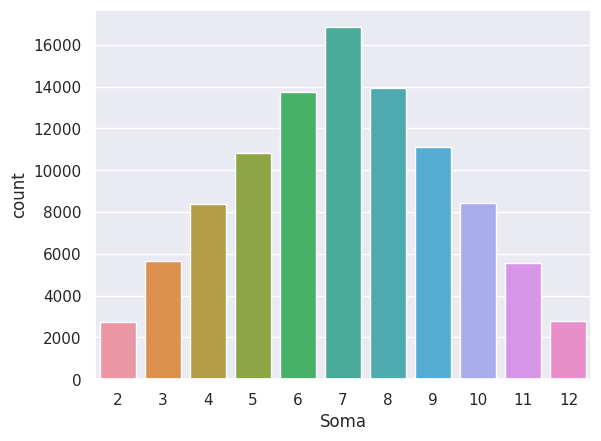

In [7]:
# Faz um gráfico contando os resultados dessa soma...
sns.countplot(df, x="Soma")


In [8]:
# Baseado na nossa intuição vimos que um possível valor para essa probabilidade era
esperado = 6/36
esperado


0.16666666666666666

In [9]:
# Quanto será a proporção da soma 7 em relação ao total de elementos
# guarda somente as linhas da tabela em que a soma é 7
resultado_7 = df[(df["Soma"] == 7)]
resultado_7.head()  # mostra as primeiras 5 linhas


,Primeiro,Segundo,Soma
0,3,4,7
12,2,5,7
14,5,2,7
18,3,4,7
21,1,6,7


In [10]:
qtd_lançamentos_7 = len(resultado_7)  # quantas linhas tem nessa tabela
qtd_lançamentos = len(df)  # quantas linhas tem na tabela total
proporção = qtd_lançamentos_7 / qtd_lançamentos
erro = abs(proporção - esperado)  # valor absoluto do erro

print(f"Foram {qtd_lançamentos_7} lançamentos em que a soma deu 7")
print(f"Foram {qtd_lançamentos} lançamentos ao total")
print(f"A proporção é de {proporção}")
print(
    f"Baseado no experimento o erro é de |{proporção:0.5f} - {esperado:0.5f}| = {erro:0.5f}")


Foram 16841 lançamentos em que a soma deu 7
Foram 100000 lançamentos ao total
A proporção é de 0.16841
Baseado no experimento o erro é de |0.16841 - 0.16667| = 0.00174


Claro que para validar **"de verdade"** esse modelo teríamos que fazer o experimento de verdade e comparar esses resultados.
